In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [4]:
# Load Titanic dataset 
df = pd.read_csv('../data/Titanic_rows.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [Class, Sex, Age, Survived]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


In [5]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Empty DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


Survived_Yes
False    1490
True      711
Name: count, dtype: int64
Survived_Yes
False    67.696502
True     32.303498
Name: count, dtype: float64


,Class_2nd,Class_3rd,Class_Crew,Sex_Male,Age_Child,Survived_Yes
0,False,True,False,True,True,False
1,False,True,False,True,True,False
2,False,True,False,True,True,False
3,False,True,False,True,True,False
4,False,True,False,True,True,False


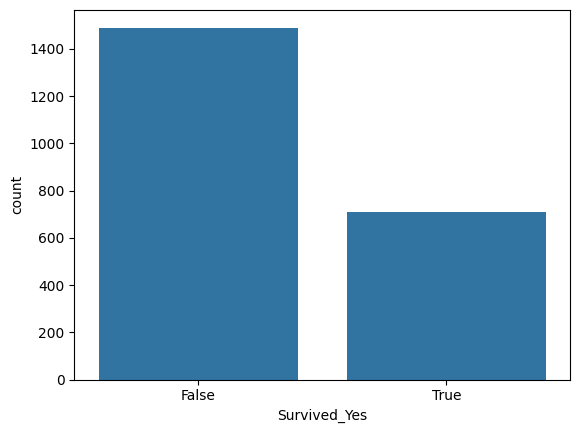

In [6]:
df_obj= pd.get_dummies(df_obj, drop_first=True)
# df_obj= pd.get_dummies(df_obj)
print(df_obj['Survived_Yes'].value_counts())
print( (df_obj['Survived_Yes'].value_counts()/ df_obj['Survived_Yes'].value_counts().sum()) * 100)
sns.countplot(data=df_obj, x='Survived_Yes')
df_obj.head()

In [7]:
attr = df_obj.drop('Survived_Yes', axis=1)
target = df_obj['Survived_Yes']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,max_leaf_nodes=5)
# model = DecisionTreeClassifier(criterion='gini', max_depth=3,max_leaf_nodes=5)

In [9]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.7700453857791225  

 Confusion Matrix:
[[439   6]
 [146  70]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.99      0.85       445
        True       0.92      0.32      0.48       216

    accuracy                           0.77       661
   macro avg       0.84      0.66      0.67       661
weighted avg       0.81      0.77      0.73       661



In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);

## Stop here just an example of C4.5

In [ ]:
# pip install c45-decision-tree

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from C45 import C45Classifier

In [14]:
# Initialize the classifier (replace with C45Classifier if available)
# clf = DecisionTreeClassifier(criterion='entropy')  # C4.5 uses information gain (entropy)
clf=C45Classifier()
# Train the classifier
clf.fit(attr_train,target_train)
target_pred2 = clf.predict(attr_test)
print(f"\n Accuracy: {accuracy_score(target_test,target_pred2)}  ")

print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred2))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred2))



 Accuracy: 0.7700453857791225  

 Confusion Matrix:
[[439   6]
 [146  70]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.99      0.85       445
        True       0.92      0.32      0.48       216

    accuracy                           0.77       661
   macro avg       0.84      0.66      0.67       661
weighted avg       0.81      0.77      0.73       661



In [ ]:
# You can use graphviz to show the tree but not straight forward.
# pip install graphviz

In [15]:
#  Feature importance for Mean Decrease Accuracy
feature_importance = model.feature_importances_
# # Feature importance for Mean Decrease GINI
 
print(f"feature importance: {feature_importance}" )


feature importance: [0.         0.26623201 0.         0.69547536 0.03829263]


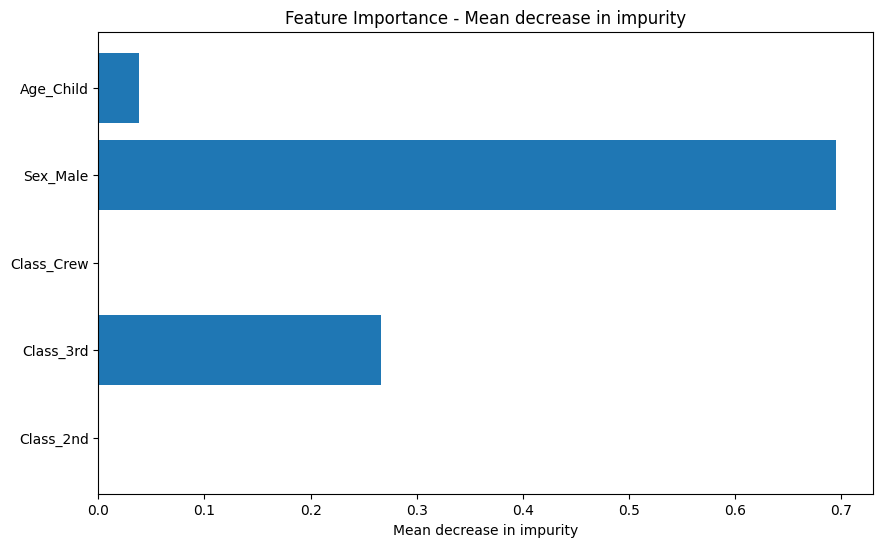

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), attr.columns)
plt.xlabel('Mean decrease in impurity')
plt.title('Feature Importance - Mean decrease in impurity')
plt.show()